# Analysis of Grid Search Results

## I. Introduction: Analyzing gridsearch results

In the process of this analysis, we have trained hundreds of LDA models with varying parameters. We tried to be systematic in this process, searching across specific values in a kind of "grid" across the search space. This notebook shows the analysis of the various grid searches we did across parameters like the number of topics, word filters, and alpha values. It also shows why we ended up choosing the parameters we did.

We start by importing all of our packages:

In [1]:
# Print out  all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #default 'last_expr'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

import pandas as pd
import numpy as np

import pickle

import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
#import nltk
#from nltk.corpus import wordnet
#from nltk import pos_tag
#nltk.download('wordnet',quiet=True)
##nltk.download('punkt',quiet=True)   #required by word_tokenize method
#nltk.download('averaged_perceptron_tagger',quiet=True) #required by pos_tag method
#import os

In [3]:
from helpers import path_pdf,path_pkl

Now, we import the datafile for the words and bigrams:

In [4]:
with open(path_pkl+'scied_words_bigrams_V5.pkl','rb') as f: data_words_bigrams = pickle.load(f)

## I. Plotting the grid search results

### A. Defining a plotting function

Next, we define a function that will allow us to plot the results of the grid search. This function essentially just creates a plot of coherence as function of number of topics.

## III. Results of grid search across alpha values

As part of the analysis, we have done a large number of runs with different alpha values: 1, 5, 7.5, 10, and 12.5. Note that in each case, the alpha value will end up being divided by the number of topics, such that the actual alpha value for each topic will be 1/alpha. This value will then be given used as a dirichlet prior to determine the topic mixture across each document. In practice, this means that with 10 topics and a given alpha value of 1, each topic will have a dirichlet prior of 1/10, indicating a strong favor for a small number of topics while an alpha value of 12.5 will give a dirichlet prior of 1.25 which corresponds to a more even mixture of topics.

With this dataset, we can now see how much the coherence depends on the given alpha values.

In [5]:
files = ['scied_norefs_gs_seed0-10.pkl','scied_norefs_gs_seed10-20.pkl', 'scied_norefs_gs_k26-28_seed0-40.pkl', 'scied_norefs_gs_seed20.pkl']

df_tot = pd.DataFrame()
for filename in files:
    with open(path_pkl+filename,'rb') as f: df = pickle.load(f)
    df_tot = pd.concat((df_tot, df), axis=0)
    
df = df_tot.copy(); del df_tot
df = df.reset_index(drop=True).reindex(index=range(0,len(df))) #.drop(columns='index')
df.shape
df.head()

(450, 6)

,num_topics,coherence,model,seed,no_below,no_above
0,15.0,0.495602,"LdaModel(num_terms=24940, num_topics=15, decay...",0.0,15,0.5
1,15.0,0.505092,"LdaModel(num_terms=24940, num_topics=15, decay...",1.0,15,0.5
2,15.0,0.485083,"LdaModel(num_terms=24940, num_topics=15, decay...",2.0,15,0.5
3,15.0,0.502004,"LdaModel(num_terms=24940, num_topics=15, decay...",3.0,15,0.5
4,15.0,0.495734,"LdaModel(num_terms=24940, num_topics=15, decay...",4.0,15,0.5


In [6]:
# drop some runs so that all of the k values have the same number of runs
df = df[df['seed'] < 30]

In [7]:
from helpers import elbow_plot, gridsearch_plot, plot_single_alpha

Maximum 0.513768 at num_topics=28 


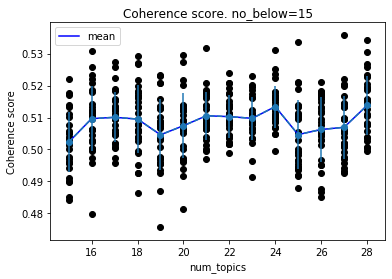

In [8]:
gridsearch_plot(df,no_below=15) #optional parameter

Based on these results, it appears that the spread of coherence values...

Maximum 0.514156 at num_topics=28 


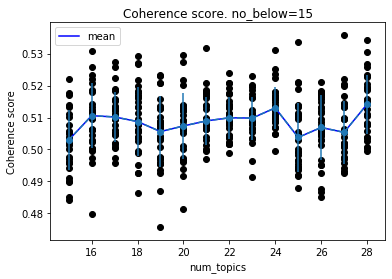

In [9]:
gridsearch_plot(df,no_below=15, aggreg_func='median') #optional parameter